In [1]:
#install xgboost using jyputer
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
ds=pd.read_csv("Downloads\mushrooms.csv")
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#xnad y 
X=pd.get_dummies(ds.drop("class",axis=1),drop_first=True)
y=pd.get_dummies(ds["class"],drop_first=True)

In [6]:
X.shape,y.shape

((8124, 95), (8124, 1))

In [7]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)





In [8]:
#modeling xgboost with defult 
from xgboost import XGBClassifier




#1st model should be with defult param 
xgb_model= XGBClassifier()

#fit the model with training data set 
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [9]:
#predict over x_train & predict over x_test
train_pred=xgb_model.predict(X_train)
test_pred=xgb_model.predict(X_test)

In [10]:
#evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

1.0
1.0


In [11]:
#appling k_fold croass validation 
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(xgb_model,X,y, cv=5)
accuracy.mean()

0.9335172413793102

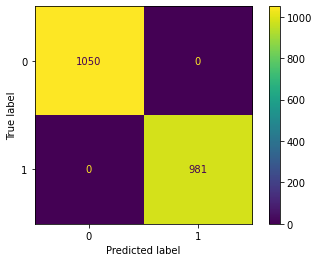

In [12]:
#confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_model,X_test,y_test)
plt.show()

In [13]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [14]:
#hyerpamater tunning 
from sklearn.model_selection import GridSearchCV
xgb_model= XGBClassifier()
param_grid={"n_estimators":[1,5,66,7,2,100],"max_depth":[3,4,5,6],"gamma":[0,1,2,4]}

In [15]:
grid=GridSearchCV(xgb_model,param_grid,cv=5,scoring="accuracy")
grid.fit(X_train,y_train)

grid.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 66}

In [16]:
prediction=grid.predict(X_test)

In [17]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [18]:
#feature importances
grid.best_estimator_.feature_importances_

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.1960378e-04, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.4994617e-04,
       1.2865996e-02, 3.2254919e-02, 2.8353047e-03, 3.0265657e-02,
       7.8178041e-02, 3.9771278e-03, 1.9646199e-01, 1.6804084e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.2509102e-03,
       1.2028074e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.3748756e-04, 0.0000000e+00,
       5.1878911e-04, 2.8716191e-04, 3.4324738e-01, 0.0000000e+00,
       1.7382608e-01, 1.9392621e-03, 1.1988877e-04, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.0119468e-02, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [19]:
imp_f=pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=["importances"])
imp_f

,importances
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [20]:
imp_f.sort_values("importances",ascending=False)

,importances
stalk-root_c,0.343247
odor_n,0.196462
stalk-root_r,0.173826
odor_l,0.078178
bruises_t,0.032255
...,...
gill-color_r,0.000000
gill-color_p,0.000000
gill-color_o,0.000000
gill-color_n,0.000000


In [21]:
imp_f.describe()

,importances
count,95.000000
mean,0.010526
std,0.044494
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000917
max,0.343247


In [22]:
imp_f=imp_f[imp_f["importances"]>0.1]

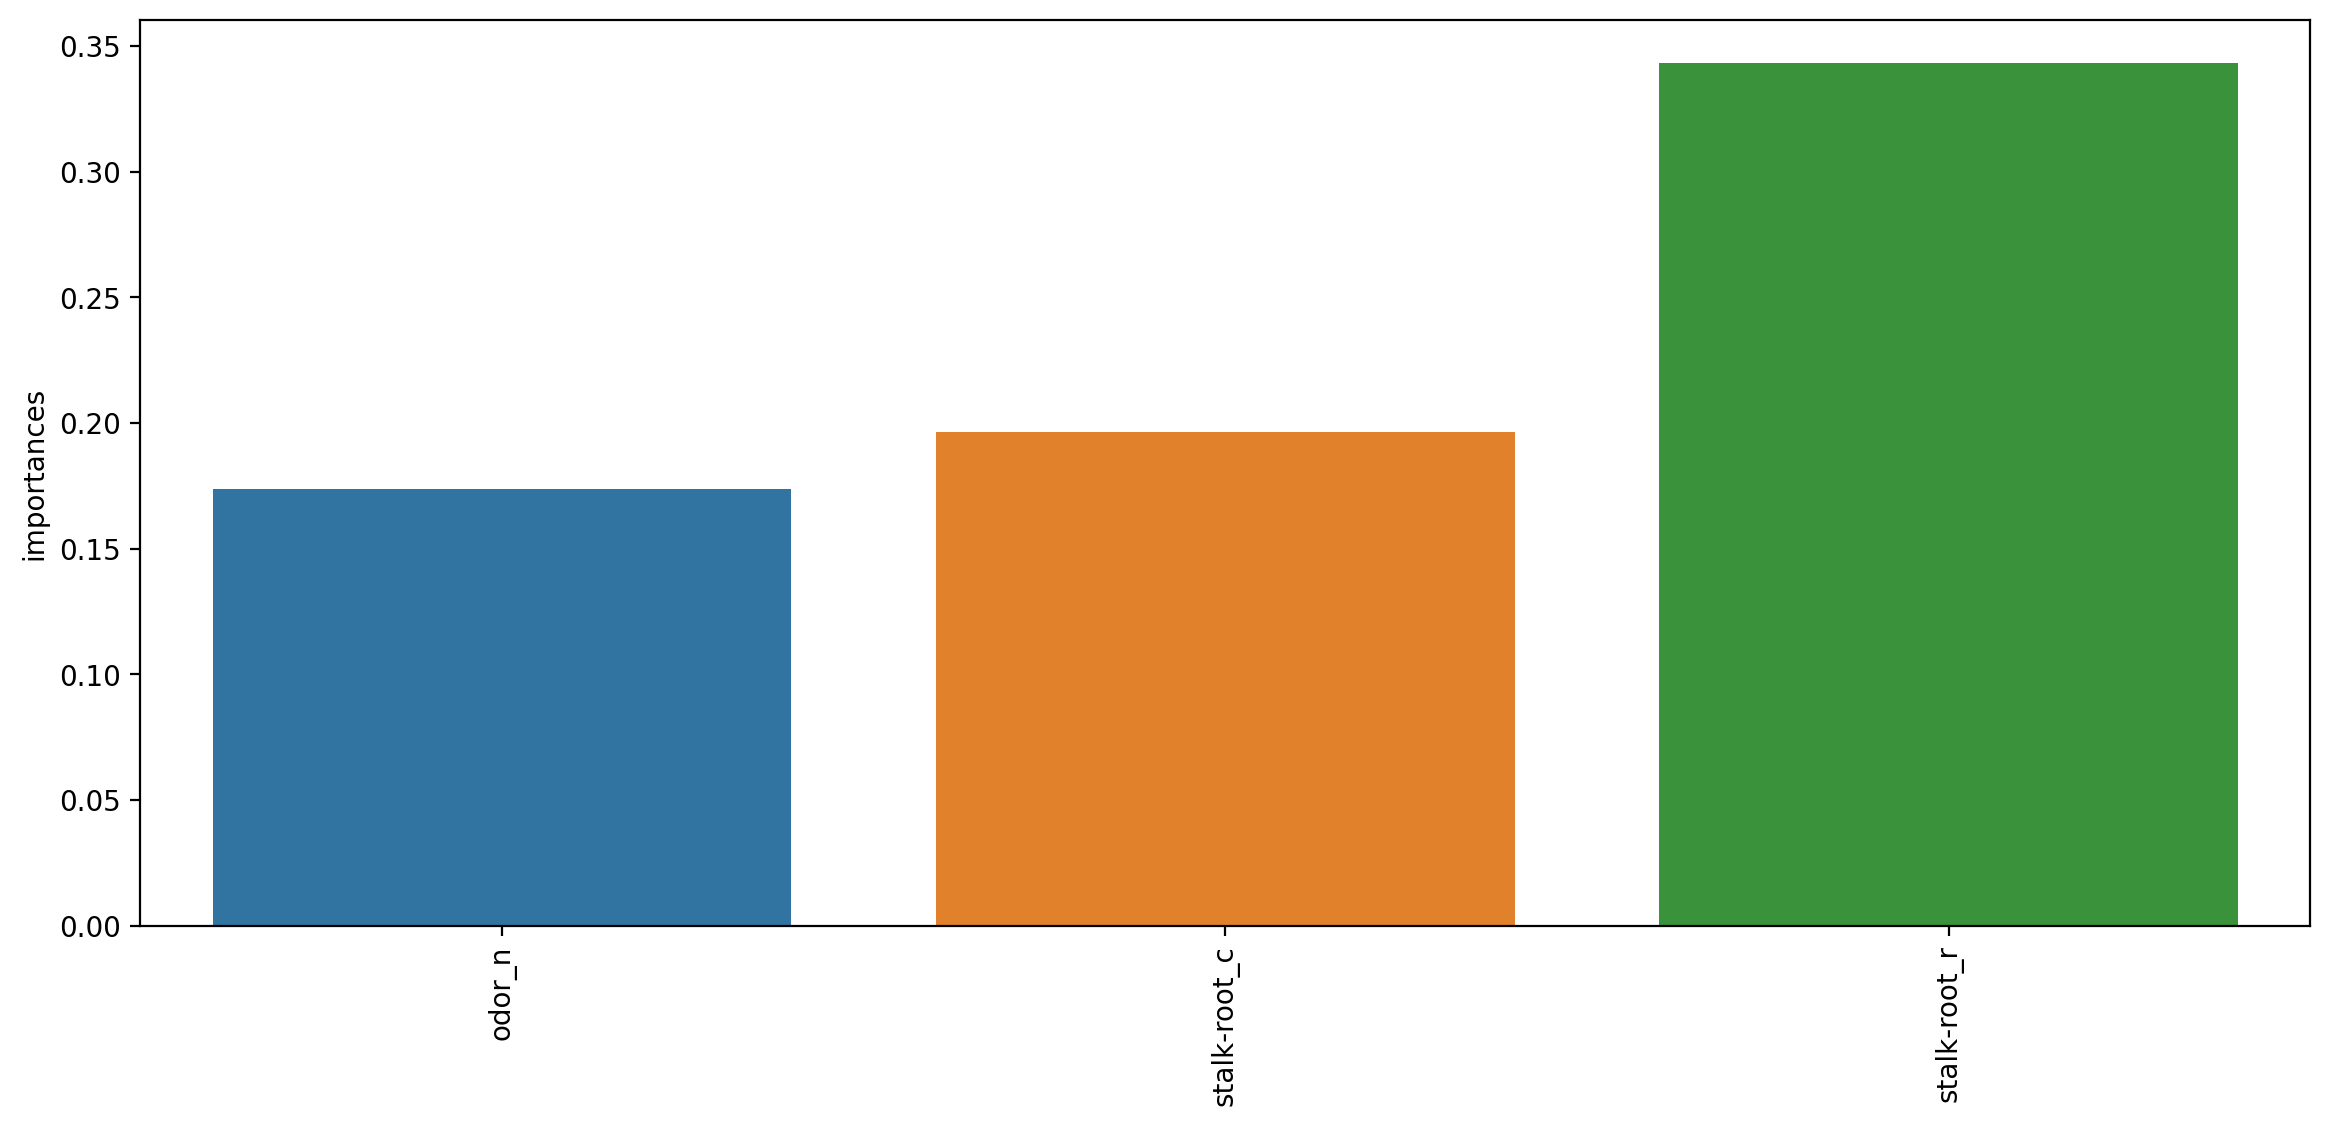

In [23]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_f.sort_values("importances"),x=imp_f.index,y="importances")
plt.xticks(rotation=90)
plt.show()